In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [177]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Solution
1. Find the linear regression equation for this data.

In [178]:
Ground_Cricket_Chirps_regressor = linear_model.LinearRegression()

In [179]:
from sklearn.model_selection import train_test_split

X = df.loc[:,["Chirps/Second"]]
y = df.loc[:,"Ground Temperature"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

#fitting linear regression model
Ground_Cricket_Chirps_regressor.fit(X_train, y_train)

LinearRegression()

2. Chart the original data and the equation on the chart.

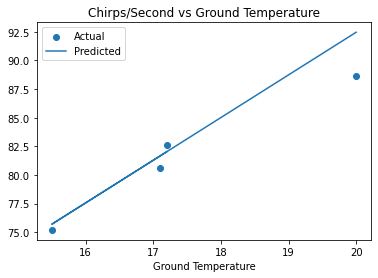

In [180]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test))
plt.xlabel("Chirps/Second")
plt.xlabel("Ground Temperature")
plt.title("Chirps/Second vs Ground Temperature")
plt.legend(["Actual", "Predicted"])
plt.show()

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [181]:
Ground_Cricket_Chirps_regressor.score(X_test, y_test)

0.8196483067037376

4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [182]:
#linear model = ground_temperature = regressor.coef_ * chriping + regressor.intercept_

chriping = (95 - Ground_Cricket_Chirps_regressor.intercept_) / Ground_Cricket_Chirps_regressor.coef_
chriping

array([20.68255307])

5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [183]:
Ground_Cricket_Chirps_regressor.predict([[18]])

C:\Users\user\Anaconda3\envs\guvi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([85.00804558])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [184]:
df = pd.read_fwf("brain_body.txt")

1. Find the linear regression equation for this data for brain weight to body weight.

In [185]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [186]:
iqr = df.Body.quantile(0.75) - df.Body.quantile(0.25)
Body_upper_threshold = df.Body.quantile(0.75) + (1.5 * iqr)
Body_lower_threshold = df.Body.quantile(0.25) - (1.5 * iqr)
print("Body - Lower Threshold", Body_lower_threshold)
print("Body - Upper Threshold", Body_upper_threshold)

Body - Lower Threshold -238.375
Body - Upper Threshold 408.625


In [187]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
Brain_upper_threshold = df.Brain.quantile(0.75) + (1.5 * iqr)
Brain_lower_threshold = df.Brain.quantile(0.25) - (1.5 * iqr)
print("Brain - Lower Threshold", Brain_lower_threshold)
print("Brain - Upper Threshold", Brain_upper_threshold)

Brain - Lower Threshold -70.80375000000001
Brain - Upper Threshold 119.60625


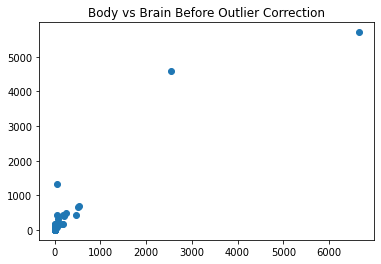

In [188]:
plt.scatter(df["Brain"], df["Body"])
plt.title("Body vs Brain Before Outlier Correction")
plt.show()

In [189]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


Since there are outliers present in the data the values is capped using the Threshold values of both Body and Brain.

In [190]:
df['Body'][df['Body'] >= upper_threshold] = Body_upper_threshold
df['Brain'][df['Brain'] >= upper_threshold] = Brain_upper_threshold

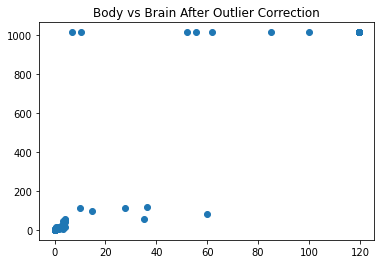

In [191]:
plt.scatter(dff["Brain"], dff["Body"])
plt.title("Body vs Brain After Outlier Correction")
plt.show()

In [192]:
df.corr()

,Brain,Body
Brain,1.000000,0.879106
Body,0.879106,1.000000


We can see the Extreme values are removed from the data from the scatter plot and the correlation value is also maintained. Hen ce we will fit the model with the modified dataset. 

In [193]:
Brain_Body_Weight_regressor = linear_model.LinearRegression()

In [194]:
X = df.loc[:,['Brain']].values
y = df.loc[:,['Body']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

Brain_Body_Weight_regressor.fit(X_train, y_train)

LinearRegression()

2. Chart the original data and the equation on the chart.

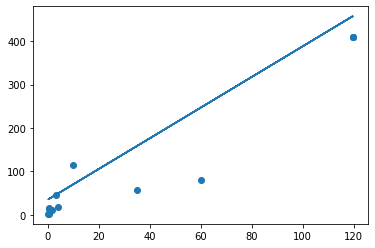

In [195]:
plt.scatter(X_test, y_test)
plt.plot(X_test, Brain_Body_Weight_regressor.predict(X_test))
plt.show()

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [196]:
Brain_Body_Weight_regressor.score(X_test, y_test)
# ('R2_SCORE', metrics.r2_score(y_test, Brain_Body_Weight_regressor.predict(X_test)))

0.8437067215334516

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [197]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [198]:
print(df.dtypes)
df.describe()

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object


,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [199]:
df.corr()["Salary"]

Sex      -0.252782
Rank      0.867488
Year      0.700669
Degree   -0.069726
YSdeg     0.674854
Salary    1.000000
Name: Salary, dtype: float64

Since the data is proper format and the values lie within the permissible range there is not need of any data cleaning and we can apply the LinearRegression for the model.

We should note that `Degree` is not correlated with strong value with `Salary`

In [200]:
Salary_Discrimination_regressor = linear_model.LinearRegression()

X = df.loc[:,["Sex",'Rank', 'Year','Degree','YSdeg']].values
y = df.loc[:,"Salary"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Salary_Discrimination_regressor.fit(X_train, y_train)

LinearRegression()

2. Find the selection of columns with the best $R^2$ score.

In [201]:
coef_df = pd.DataFrame(Salary_Discrimination_regressor.coef_,['Sex', 'Rank','Year','Degree','YSdeg'], columns=['Coefficient'])
coef_df

,Coefficient
Sex,1046.765305
Rank,5766.274169
Year,413.395215
Degree,-2057.183140
YSdeg,-187.351555


From the above coefficient absolute values the `Rank` is primary deciding factor in the salary.

3. Report whether sex is a factor in salary.

From the Coefficient data the model is primarly dependent on the `Rank` and `Salary` is the second primary factor.

# Assignment 8

## How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

### Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

### Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

### Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [202]:
df = pd.read_csv("car_data.csv")

In [203]:
print(df.dtypes)
df.describe()

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


#### Tasks, Part 1
1. Find the linear regression equation for mileage vs price.

In [204]:
X = df.loc[:,["Mileage"]].values
y = df.loc[:,"Price"].values

milage_price_regressor = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

milage_price_regressor.fit(X_train, y_train)

LinearRegression()

2. Chart the original data and the equation on the chart.

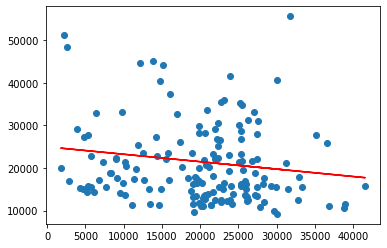

In [205]:
plt.scatter(X_test, y_test)
plt.plot(X_test, milage_price_regressor.predict(X_test), color = "red")
plt.show()

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [206]:
milage_price_regressor.score(X_test, y_test)

0.0131586235130281

From the Value the Model is not a good fit for this data. We should drop the model for Implementation.

#### Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [207]:
X = df.loc[:,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']].values
half_model_regressor = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
half_model_regressor.fit(X_train, y_train)

LinearRegression()

2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [208]:
half_model_regressor.score(X_test, y_test)

0.411206577208975

The model is a descent fit but still not a strong model for price Predection.

3. Find the combination of the factors that is the best predictor for price.

In [209]:
coef_df = pd.DataFrame(half_model_regressor.coef_,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'], columns=['Coefficient'])
coef_df

,Coefficient
Mileage,-0.169485
Cylinder,4377.372131
Liter,-1519.556394
Doors,-1760.664307
Cruise,6557.462509
Sound,-1618.527648
Leather,3116.786801


From the above coefficient absolute values `Cruise`, `Cylinder`, `Leather` are the top 3 best factors for the prediction of price.

#### Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [210]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [211]:
df["Make"].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [212]:
df["Model"].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [213]:
df["Type"].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [214]:
encoded_df = pd.get_dummies(df, columns = ["Make", "Model", "Type"])
encoded_df.drop("Trim", axis = 1, inplace = True)
encoded_df

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,Make_Cadillac,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,6,3.0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


The above table is One Hot encoded for the `Make`, `Model`, `Type` adn the `Trim` column is dropped from the data frame. The same is used for the model fitting

2. Find the best combination of factors to predict price.

In [215]:
col_name = list(encoded_df.columns)

X = encoded_df.loc[:,col_name].values

full_model_regressor = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
full_model_regressor.fit(X_train, y_train)

LinearRegression()

In [216]:
coef_df = pd.DataFrame(full_model_regressor.coef_,col_name, columns=['Coefficient'])
coef_df

,Coefficient
Price,1.000000e+00
Mileage,1.395414e-16
Cylinder,-4.831832e-12
Liter,7.516991e-12
Doors,-6.545767e-14
Cruise,-1.527836e-12
Sound,-1.169978e-12
Leather,6.534018e-14
Make_Buick,-9.108492e-13
Make_Cadillac,3.462706e-12


The above table shows the Different values of the Coefficient for the all the columns except for the `Trim` from the dataset.